In [3]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for plots
sns.set(style="whitegrid")

# 📂 Load the dataset (adjust the filename if needed)
df = pd.read_csv('aquaculture.csv')

# 👁️ 1. Initial Inspection
print("📄 First 5 rows of the dataset:")
display(df.head())

📄 First 5 rows of the dataset:


,id,temperatura,oxigeno,ph,turbidez,hour,day,month,temperatura_scaled,oxigeno_scaled
0,49,1.001750,0.089269,0.937644,-0.008761,19,17,1,27.041814,7.968205
1,55,1.044218,0.621644,0.936319,-0.043164,19,24,1,27.330717,8.190253
2,88,0.981081,0.234554,0.997134,0.027833,20,25,1,26.901205,8.028802
3,106,0.990495,-0.715270,0.946473,0.017791,20,27,1,26.965247,7.632639
4,113,1.031420,-0.611011,0.906770,0.006865,20,5,1,27.243652,7.676124


In [4]:
# 📅 4. Create datetime column
df['datetime'] = pd.to_datetime(dict(year=2024, month=df['month'], day=df['day'], hour=df['hour']))
df = df.sort_values(by='datetime')

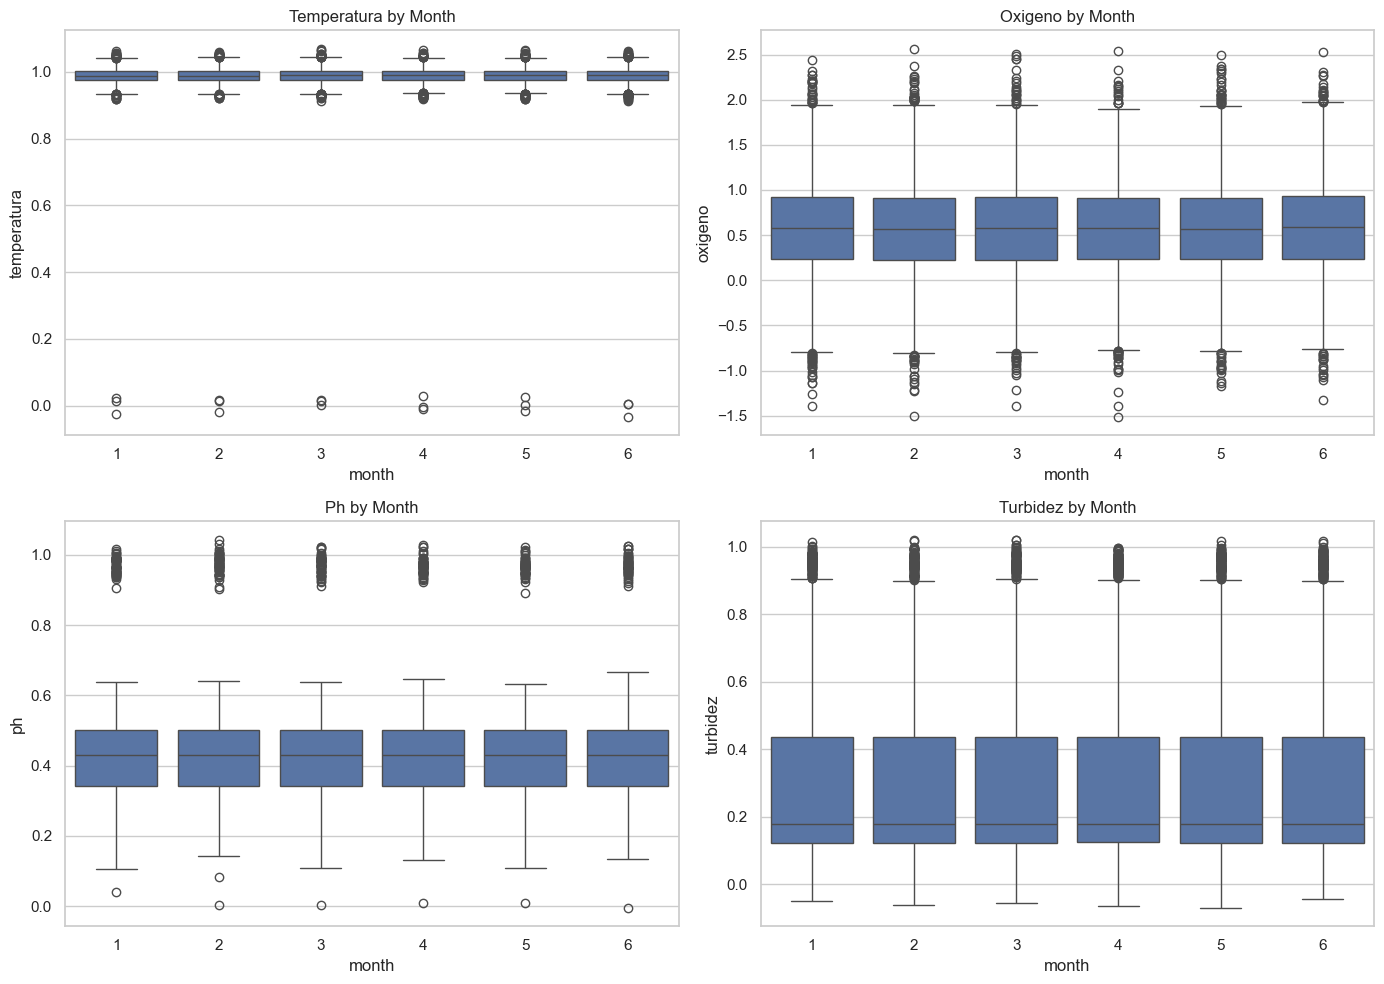

In [6]:
# Boxplots by Month
plt.figure(figsize=(14, 10))
for i, col in enumerate(['temperatura', 'oxigeno', 'ph', 'turbidez']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='month', y=col, data=df)
    plt.title(f"{col.capitalize()} by Month")
plt.tight_layout()
plt.show()



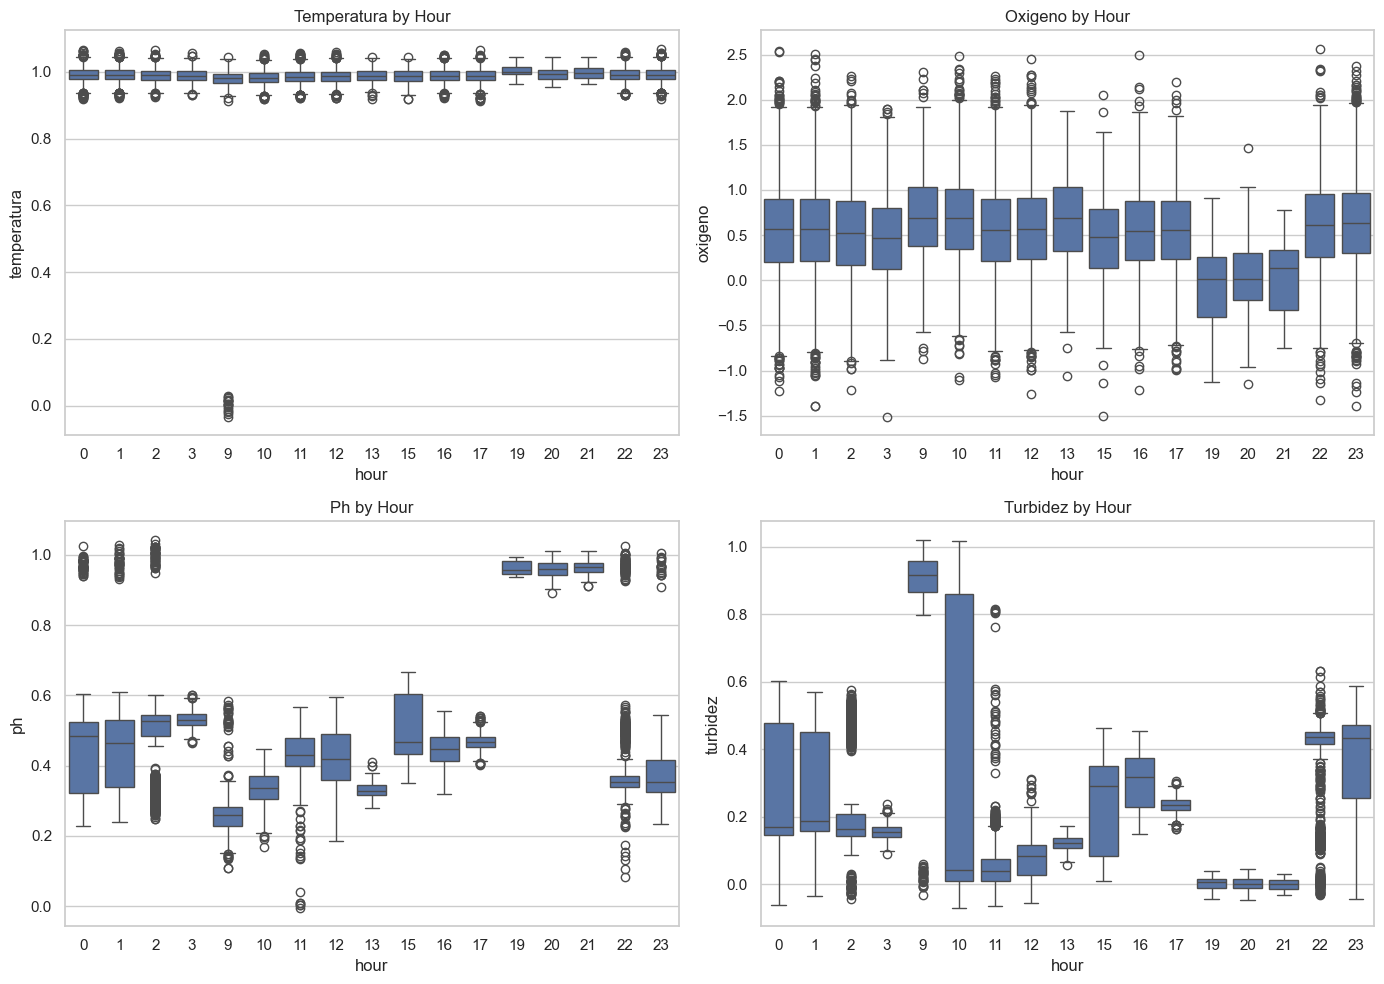

In [7]:
# Boxplots by Hour
plt.figure(figsize=(14, 10))
for i, col in enumerate(['temperatura', 'oxigeno', 'ph', 'turbidez']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='hour', y=col, data=df)
    plt.title(f"{col.capitalize()} by Hour")
plt.tight_layout()
plt.show()

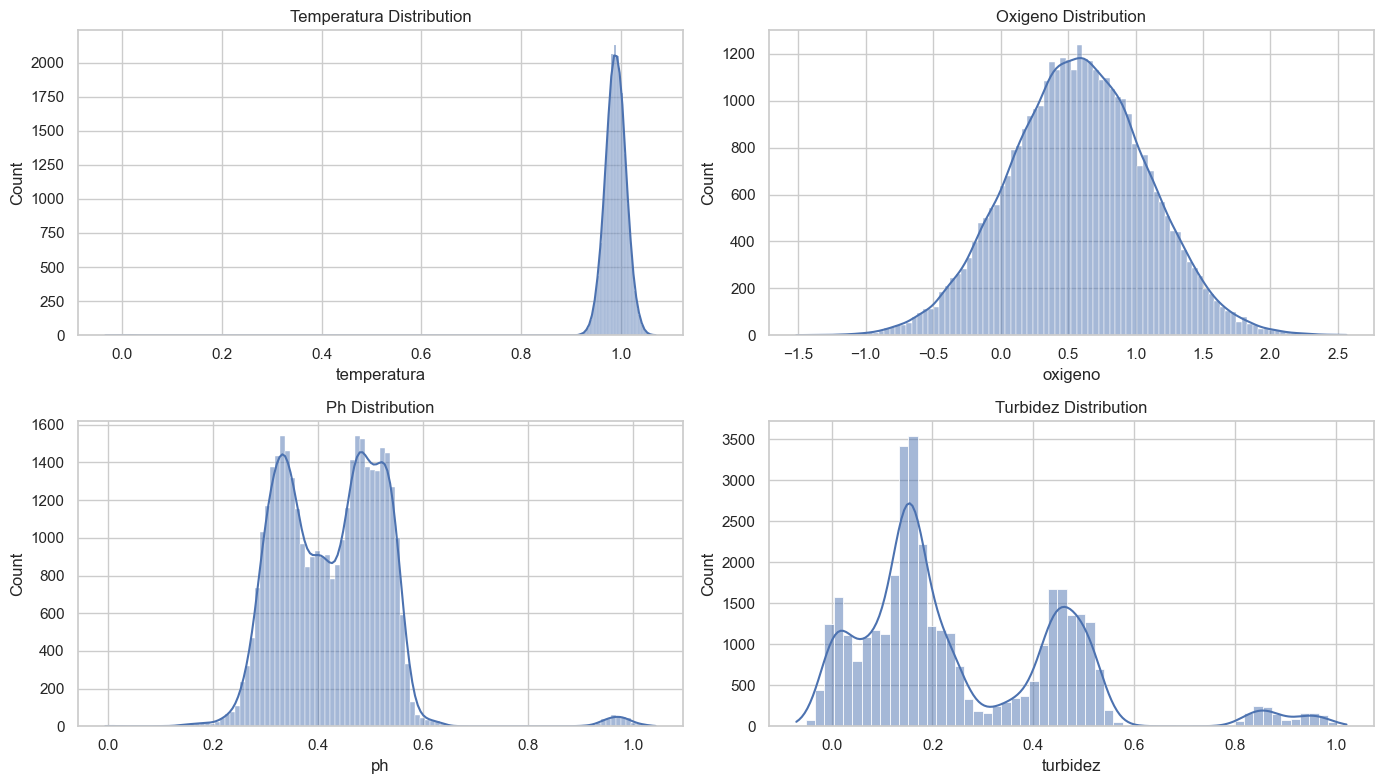

In [8]:
# 📊 6. Distribution Plots
plt.figure(figsize=(14, 8))
for i, col in enumerate(['temperatura', 'oxigeno', 'ph', 'turbidez']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col.capitalize()} Distribution")
plt.tight_layout()
plt.show()

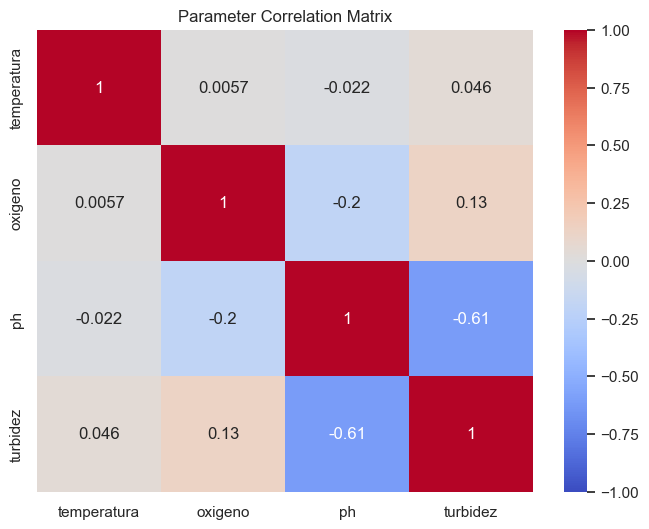

In [9]:
# Correlation matrix and heatmap
corr_matrix = df[['temperatura', 'oxigeno', 'ph', 'turbidez']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Parameter Correlation Matrix')
plt.show()

<Figure size 1500x1000 with 0 Axes>

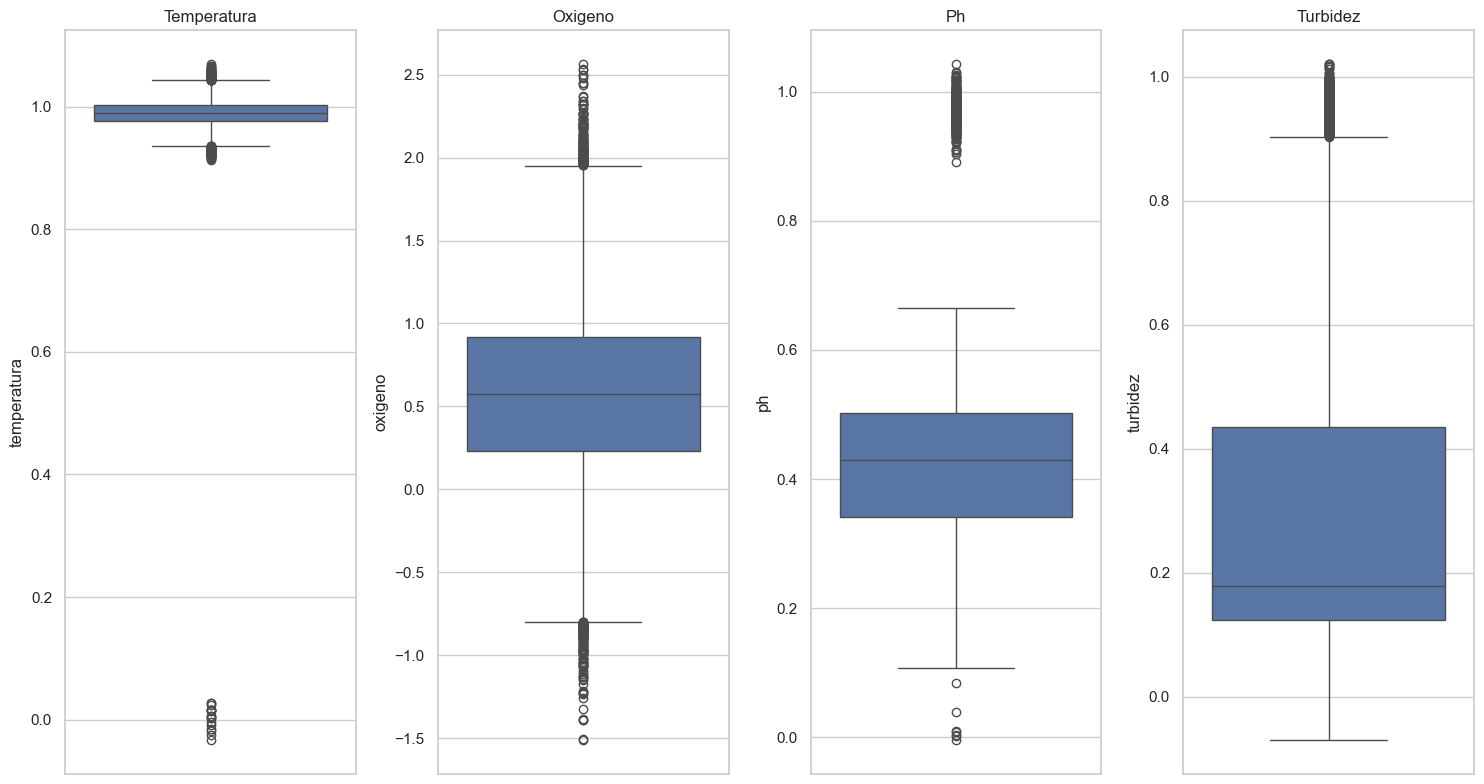

In [11]:
plt.figure(figsize=(15, 10))
params = ['temperatura', 'oxigeno', 'ph', 'turbidez']
# Outlier detection using boxplots
plt.figure(figsize=(15, 8))
for i, param in enumerate(params, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[param])
    plt.title(param.capitalize())
plt.tight_layout()
plt.show()